In [1]:
from clean2 import *
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import CategoricalDtype
import seaborn as sns

In [2]:
# data wrangling
df = data_wrangling()
df

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,AMPM,DAY_NAME
192877,2016-09-16 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,21:00:00,5554,271,PM,Friday
192876,2016-09-16 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,17:00:00,5554,271,PM,Friday
192875,2016-09-16 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,13:00:00,5554,271,PM,Friday
192874,2016-09-16 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,09:00:00,5554,271,AM,Friday
192873,2016-09-16 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,05:00:00,5554,271,AM,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2016-08-27 16:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,5799833,1966214,PM,Saturday
3,2016-08-27 12:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,5799610,1966155,PM,Saturday
2,2016-08-27 08:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,5799492,1966079,AM,Saturday
1,2016-08-27 04:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,5799463,1966044,AM,Saturday


In [3]:
# df.columns

In [4]:
# daily_entries = df.groupby(
#     ["C/A", "UNIT", "SCP", "STATION", "DATE", "AMPM", "DAY_NAME"], as_index=False
# ).ENTRIES.max()


# df.rename(columns={'EXITS                                                               ': 
#                    'EXITS'}, inplace=True)
# t = df.groupby(
#     ["C/A", "UNIT", "SCP", "STATION", "DATE", "AMPM", "DAY_NAME"], as_index=False
# ).EXITS.max()

# daily_entries['EXITS'] = t['EXITS']
# daily_entries

In [5]:
# daily_entries[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = daily_entries.groupby(
#         ["C/A", "UNIT", "SCP", "STATION", "AMPM"]
#     )[["DATE", "ENTRIES", "EXITS"]].apply(lambda grp: grp.shift(1))


In [6]:
# daily_entries

In [7]:
# get_daily_entries
tmp = get_tmp_entries(df)

In [8]:
tmp[tmp['DATE'] == '09/14/2016'].sort_values("TMP_ENTRIES", ascending=False).head(10)

,C/A,UNIT,SCP,STATION,DATE,AMPM,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,TMP_ENTRIES,TMP_EXITS
114894,PTH16,R550,01-02-03,LACKAWANNA,09/14/2016,PM,Wednesday,1,312,09/13/2016,36263.0,226234.0,36262.0,312.0
38405,JFK02,R535,01-00-04,HOWARD BCH JFK,09/14/2016,PM,Wednesday,90,282,09/13/2016,28806.0,11545.0,28716.0,11263.0
38278,JFK02,R535,01-00-01,HOWARD BCH JFK,09/14/2016,AM,Wednesday,70,137,09/13/2016,10855.0,3730.0,10785.0,3593.0
54272,N083,R138,01-06-00,W 4 ST-WASH SQ,09/14/2016,PM,Wednesday,8531772,9975403,09/13/2016,8522590.0,9972414.0,9182.0,2989.0
142464,R221,R170,01-00-00,14 ST-UNION SQ,09/14/2016,AM,Wednesday,9679694,6217152,09/13/2016,9670827.0,6214831.0,8867.0,2321.0
142465,R221,R170,01-00-00,14 ST-UNION SQ,09/14/2016,PM,Wednesday,9685469,6218981,09/13/2016,9676689.0,6216673.0,8780.0,2308.0
46882,N051,R084,02-00-00,59 ST COLUMBUS,09/14/2016,PM,Wednesday,8003965,890656,09/13/2016,7995465.0,889692.0,8500.0,964.0
147931,R240,R047,00-03-08,GRD CNTRL-42 ST,09/14/2016,PM,Wednesday,32596230,7379401,09/13/2016,32587812.0,7378111.0,8418.0,1290.0
106346,N606,R025,00-00-08,JAMAICA CENTER,09/14/2016,AM,Wednesday,36347977,5705818,09/13/2016,36339819.0,5705072.0,8158.0,746.0
147930,R240,R047,00-03-08,GRD CNTRL-42 ST,09/14/2016,AM,Wednesday,32590231,7378579,09/13/2016,32582107.0,7377343.0,8124.0,1236.0


In [9]:
daily = tmp.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", 'DAY_NAME'], as_index=False).TMP_ENTRIES.sum()
daily.rename(columns={"TMP_ENTRIES": "DAILY_ENTRIES"}, inplace=True)
t = tmp.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", 'DAY_NAME'], as_index=False).TMP_EXITS.sum()
# daily_entries.sort_values('DAILY_ENTRIES', ascending=False)
daily['DAILY_EXITS'] = t.TMP_EXITS
daily["DAILY_TRAFFIC"] = daily.DAILY_ENTRIES + daily.DAILY_EXITS
daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,DAY_NAME,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,A002,R051,02-00-00,59 ST,08/28/2016,Sunday,1480.0,479.0,1959.0
1,A002,R051,02-00-00,59 ST,08/29/2016,Monday,2239.0,861.0,3100.0
2,A002,R051,02-00-00,59 ST,08/30/2016,Tuesday,3118.0,1027.0,4145.0
3,A002,R051,02-00-00,59 ST,08/31/2016,Wednesday,3062.0,988.0,4050.0
4,A002,R051,02-00-00,59 ST,09/01/2016,Thursday,3187.0,992.0,4179.0
5,A002,R051,02-00-00,59 ST,09/02/2016,Friday,3226.0,885.0,4111.0
6,A002,R051,02-00-00,59 ST,09/03/2016,Saturday,2497.0,622.0,3119.0
7,A002,R051,02-00-00,59 ST,09/04/2016,Sunday,1460.0,433.0,1893.0
8,A002,R051,02-00-00,59 ST,09/05/2016,Monday,1327.0,442.0,1769.0
9,A002,R051,02-00-00,59 ST,09/06/2016,Tuesday,2101.0,880.0,2981.0


### Here we have identified top 10 most trafficked stations based on DAILY_TRAFFIC


In [10]:
t = (daily
     .groupby(["STATION"], as_index=False)
     .sum()
     .sort_values("DAILY_TRAFFIC", ascending=False))

top_10_station = list(t.STATION[:10])
t.head(10)

,STATION,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
61,34 ST-PENN STA,5688506.0,4823226.0,10511732.0
230,GRD CNTRL-42 ST,4873541.0,4409289.0,9282830.0
59,34 ST-HERALD SQ,4088807.0,3639440.0,7728247.0
46,23 ST,4041752.0,2986105.0,7027857.0
14,14 ST-UNION SQ,3618295.0,3131407.0,6749702.0
109,86 ST,3543089.0,2980642.0,6523731.0
348,TIMES SQ-42 ST,3360416.0,3093382.0,6453798.0
68,42 ST-PORT AUTH,3496096.0,2472905.0,5969001.0
223,FULTON ST,3179403.0,2551020.0,5730423.0
9,125 ST,2860884.0,2167816.0,5028700.0


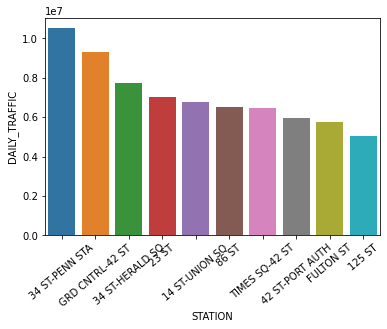

In [11]:


# plt.bar(t["STATION"][:10], t["DAILY_TRAFFIC"][:10])
# bottom = min(t["DAILY_TRAFFIC"])
# top = max(t["DAILY_TRAFFIC"])+1000000
# plt.ylim((bottom, top)) 
# plt.xticks(rotation=45);
data = t[["STATION", "DAILY_TRAFFIC"]][:10]
h = sns.barplot(x = 'STATION',y='DAILY_TRAFFIC',data=data)

h.set_xticklabels(h.get_xticklabels(), rotation=40);

### Now we have the  average numbers of daily traffic over the selected period

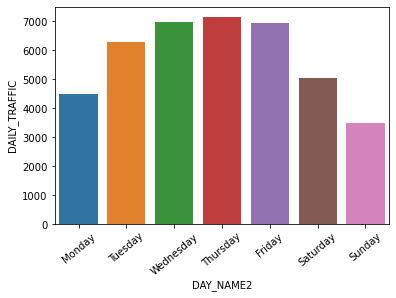

In [12]:
# put boolean values in a matrix
def sort_by_day_name(t):
    """
    Function to sort a data frame by day name
    """
    cat_day_of_week = CategoricalDtype(
            ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
            ordered=True
        )

    t['DAY_NAME2'] = t.index.astype(cat_day_of_week)
    t = t.sort_values(['DAY_NAME2'])
    t['DAY_NAME2'] = t.index
    return t

def generate_mask_for_top10_station(top_10_station, daily):
    """
    Function to generate mask for top10_station based on statin name
    """
    mask2 = np.zeros((len(daily["STATION"]), len(top_10_station)))
    for i in range(0, len(top_10_station)):    
        mask = (daily["STATION"] == top_10_station[i]).to_numpy()
        mask2[:,i] = mask
    mask = mask2.any(axis=1)
    return mask

mask = generate_mask_for_top10_station(top_10_station, daily)
t = (daily[mask]
     .groupby(["DAY_NAME"])
     .mean())

t = sort_by_day_name(t)

data = t[["DAY_NAME2", "DAILY_TRAFFIC"]][:10]
h = sns.barplot(x = 'DAY_NAME2',y='DAILY_TRAFFIC',data=data)

h.set_xticklabels(h.get_xticklabels(), rotation=40);

In [13]:
# t = (tmp["STATION", "DAY_NAME", "AMPM", "TMP_ENTRIES", "TMP_EXITS"]
#      .groupby("STATION", "DAY_NAME", "AMPM"))

daily2 = tmp.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", 'DAY_NAME',"AMPM"], as_index=False).TMP_ENTRIES.min()
daily2.rename(columns={"TMP_ENTRIES": "DAILY_ENTRIES"}, inplace=True)
t = tmp.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", 'DAY_NAME', "AMPM"], as_index=False).TMP_EXITS.min()
# daily_entries.sort_values('DAILY_ENTRIES', ascending=False)
daily2['DAILY_EXITS'] = t.TMP_EXITS
daily2["DAILY_TRAFFIC"] = daily2.DAILY_ENTRIES + daily2.DAILY_EXITS
daily2.head(10)


,C/A,UNIT,SCP,STATION,DATE,DAY_NAME,AMPM,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,A002,R051,02-00-00,59 ST,08/28/2016,Sunday,AM,803.0,238.0,1041.0
1,A002,R051,02-00-00,59 ST,08/28/2016,Sunday,PM,677.0,241.0,918.0
2,A002,R051,02-00-00,59 ST,08/29/2016,Monday,AM,701.0,340.0,1041.0
3,A002,R051,02-00-00,59 ST,08/29/2016,Monday,PM,1538.0,521.0,2059.0
4,A002,R051,02-00-00,59 ST,08/30/2016,Tuesday,AM,1579.0,507.0,2086.0
5,A002,R051,02-00-00,59 ST,08/30/2016,Tuesday,PM,1539.0,520.0,2059.0
6,A002,R051,02-00-00,59 ST,08/31/2016,Wednesday,AM,1554.0,515.0,2069.0
7,A002,R051,02-00-00,59 ST,08/31/2016,Wednesday,PM,1508.0,473.0,1981.0
8,A002,R051,02-00-00,59 ST,09/01/2016,Thursday,AM,1580.0,487.0,2067.0
9,A002,R051,02-00-00,59 ST,09/01/2016,Thursday,PM,1607.0,505.0,2112.0


In [14]:
# get the data for weekdays and weekends
mask = (daily2["DAY_NAME"] == "Sunday") | (daily2["DAY_NAME"] == "Saturday")
weekends = daily2[mask]
weekdays = daily2[~mask]
# weekdays.head(10)   
weekends.head(10)  


,C/A,UNIT,SCP,STATION,DATE,DAY_NAME,AMPM,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,A002,R051,02-00-00,59 ST,08/28/2016,Sunday,AM,803.0,238.0,1041.0
1,A002,R051,02-00-00,59 ST,08/28/2016,Sunday,PM,677.0,241.0,918.0
12,A002,R051,02-00-00,59 ST,09/03/2016,Saturday,AM,1591.0,366.0,1957.0
13,A002,R051,02-00-00,59 ST,09/03/2016,Saturday,PM,906.0,256.0,1162.0
14,A002,R051,02-00-00,59 ST,09/04/2016,Sunday,AM,794.0,239.0,1033.0
15,A002,R051,02-00-00,59 ST,09/04/2016,Sunday,PM,666.0,194.0,860.0
26,A002,R051,02-00-00,59 ST,09/10/2016,Saturday,AM,1686.0,509.0,2195.0
27,A002,R051,02-00-00,59 ST,09/10/2016,Saturday,PM,994.0,344.0,1338.0
28,A002,R051,02-00-00,59 ST,09/11/2016,Sunday,AM,887.0,327.0,1214.0
29,A002,R051,02-00-00,59 ST,09/11/2016,Sunday,PM,727.0,230.0,957.0


In [15]:
def sort_by_station(top_10_station, df):
    cat_station = CategoricalDtype(
        top_10_station,
        ordered=True
    )
    
    df['STATION'] = df['STATION'].astype(cat_station)
    df = df.sort_values(['STATION'])
    return df

In [16]:
# get weekday AMPM data
mask = generate_mask_for_top10_station(top_10_station, weekdays)
# must get the total number for each station, then do average over the selected peroid
t_wkd = weekdays[mask].groupby(["STATION","DATE","DAY_NAME","AMPM"],as_index=False).sum()
t_wkd = t_wkd.groupby(["STATION","AMPM"],as_index=False).mean()

t_wkd = t_wkd.drop(["DAILY_ENTRIES", "DAILY_EXITS"],axis=1)

t_wkd_am = t_wkd[t_wkd["AMPM"] == "AM"]
t_wkd_am = sort_by_station(top_10_station, t_wkd_am)

t_wkd_pm = t_wkd[t_wkd["AMPM"] == "PM"]
t_wkd_pm = sort_by_station(top_10_station, t_wkd_pm)


<ipython-input-15-cab3d6805208>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATION'] = df['STATION'].astype(cat_station)


In [17]:
# get weekend  AMPM data
mask = generate_mask_for_top10_station(top_10_station, weekends)
# must get the total number for each station, then do average over the selected peroid
t_wke = weekends[mask].groupby(["STATION","DATE","DAY_NAME","AMPM"],as_index=False).sum()
t_wke = t_wke.groupby(["STATION","AMPM"],as_index=False).mean()

t_wke = t_wke.drop(["DAILY_ENTRIES", "DAILY_EXITS"],axis=1)

t_wke_am = t_wke[t_wke["AMPM"] == "AM"]
t_wke_am = sort_by_station(top_10_station, t_wke_am)

t_wke_pm = t_wke[t_wke["AMPM"] == "PM"]
t_wke_pm = sort_by_station(top_10_station, t_wke_pm)


<ipython-input-15-cab3d6805208>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATION'] = df['STATION'].astype(cat_station)


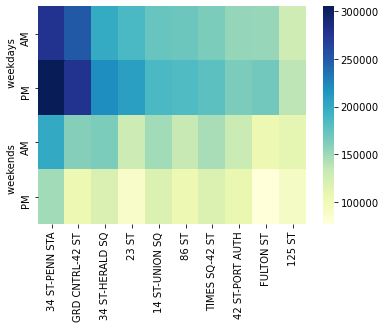

In [18]:
m = np.zeros((4, len(top_10_station)))
m[0,:] = t_wkd_am["DAILY_TRAFFIC"].to_numpy()
m[1,:] = t_wkd_pm["DAILY_TRAFFIC"].to_numpy()
m[2,:] = t_wke_am["DAILY_TRAFFIC"].to_numpy()
m[3,:] = t_wke_pm["DAILY_TRAFFIC"].to_numpy()


xticklabels = top_10_station
yticklabels = ["AM", "PM","AM", "PM"]
h = sns.heatmap(m,cmap= "YlGnBu"
            , annot=False
           ,xticklabels=xticklabels
           ,yticklabels=yticklabels
           ); #coolwarm; #YlGnBu
h.set_xticklabels(h.get_xticklabels(), rotation=90);
plt.ylabel("weekends                  weekdays");
